In [52]:
from obspy import read
from os import listdir
from random import randint
import numpy as np
import signal_m as s
import keras
import sys
import pandas as pd
from obspy.core import UTCDateTime
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, LSTM, Flatten, MaxPooling1D
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from IPython.display import clear_output

In [2]:
data_folder = "E:\\obspy_data_processing\\OBSPY\\dataset"

In [3]:
def get_timestamp_code(timestamp, timestamp_dict):
    if timestamp in timestamp_dict:
        return timestamp_dict[timestamp]
    else:
        dict_values = list(timestamp_dict.values())
        if len(dict_values) > 0:
            last_value = np.sort(dict_values)[-1]
            new_value = last_value+1
            timestamp_dict[timestamp] = new_value
            return new_value
        else:
            timestamp_dict[timestamp] = 0
            return 0

In [4]:
dataset = list()
timestamp_dict = {}
for filename in listdir(data_folder):
        stream = read(data_folder+"\\" + filename)
        label = filename[15:29]
        date = label[0:4]+label[4:6]+label[6:8]+"T"+label[8:10]+":"+label[10:12]+":"+label[12:14]
        try:
            peak_time = UTCDateTime(date)
            timestamp = np.int64(peak_time.datetime.timestamp())
            timestamp_code = get_timestamp_code(timestamp, timestamp_dict)
        except:
            print ("Unexpected error:", sys.exc_info()[0])
            continue
#         trace_times = [x.datetime.timestamp() for x in stream[0].times("utcdatetime")]
#         trace_times_np = np.asarray(trace_times, dtype=np.int64)
        
#         try:
#             #ищем ближайший к событию индекс в массиве времён 
#             idx = (np.abs(trace_times_np - peak_time.datetime.timestamp())).argmin()
#         except:
#             print ("Unexpected error:", sys.exc_info()[0])
        
        for trace in stream:
            dataset.append({'X':trace.data/np.max(trace.data), 'FN': filename, 'Y': timestamp_code}) 
#             dataset.append({'X':trace.data/np.max(trace.data), 'FN': filename, 'Y': idx}) 


timestamp=1525503798, code=0
timestamp=1525503798, code=0
timestamp=1525503798, code=0
timestamp=1525503798, code=0
timestamp=1525503798, code=0
timestamp=1525503798, code=0
timestamp=1525503798, code=0
timestamp=1525503798, code=0
timestamp=1525504160, code=1
timestamp=1525504160, code=1
timestamp=1525504160, code=1
timestamp=1525504160, code=1
timestamp=1525504160, code=1
timestamp=1525504160, code=1
timestamp=1525504160, code=1
timestamp=1525504160, code=1
timestamp=1525536442, code=2
timestamp=1525536442, code=2
timestamp=1525536442, code=2
timestamp=1525536442, code=2
timestamp=1525536442, code=2
timestamp=1525536442, code=2
timestamp=1525536442, code=2
timestamp=1525536442, code=2
timestamp=1525566576, code=3
timestamp=1525566576, code=3
timestamp=1525566576, code=3
timestamp=1525566576, code=3
timestamp=1525566576, code=3
timestamp=1525566576, code=3
timestamp=1525566576, code=3
timestamp=1525566576, code=3
timestamp=1525566649, code=4
timestamp=1525566649, code=4
timestamp=1525

timestamp=1525971160, code=34
timestamp=1525971160, code=34
timestamp=1525971190, code=35
timestamp=1525971190, code=35
timestamp=1525971190, code=35
timestamp=1525971190, code=35
timestamp=1525971190, code=35
timestamp=1525971190, code=35
timestamp=1525971190, code=35
timestamp=1525971190, code=35
timestamp=1525971265, code=36
timestamp=1525971265, code=36
timestamp=1525971265, code=36
timestamp=1525971265, code=36
timestamp=1525971265, code=36
timestamp=1525971265, code=36
timestamp=1525971265, code=36
timestamp=1525971265, code=36
timestamp=1525971761, code=37
timestamp=1525971761, code=37
timestamp=1525971761, code=37
timestamp=1525971761, code=37
timestamp=1525971761, code=37
timestamp=1525971761, code=37
timestamp=1525971761, code=37
timestamp=1525971761, code=37
timestamp=1525971884, code=38
timestamp=1525971884, code=38
timestamp=1525971884, code=38
timestamp=1525971884, code=38
timestamp=1525971884, code=38
timestamp=1525971884, code=38
timestamp=1525971884, code=38
timestamp=

timestamp=1526404035, code=65
timestamp=1526404035, code=65
timestamp=1526404035, code=65
timestamp=1526404035, code=65
timestamp=1526404035, code=65
timestamp=1526404035, code=65
timestamp=1526404035, code=65
timestamp=1526404035, code=65
timestamp=1526409370, code=66
timestamp=1526409370, code=66
timestamp=1526409370, code=66
timestamp=1526409370, code=66
timestamp=1526409370, code=66
timestamp=1526409370, code=66
timestamp=1526409370, code=66
timestamp=1526409370, code=66
timestamp=1526680523, code=67
timestamp=1526680523, code=67
timestamp=1526680523, code=67
timestamp=1526680523, code=67
timestamp=1526680523, code=67
timestamp=1526680523, code=67
timestamp=1526680523, code=67
timestamp=1526680523, code=67
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpec

In [6]:
plot_losses = PlotLosses()

In [7]:
df = pd.DataFrame(dataset)
X = df['X'].tolist()
Y = df['Y'].tolist()

In [8]:
seed = 7
test_size = 0.33

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state = seed)
X_train = np.array(X_train)
y_train = np.array(y_train)

In [20]:
modela = Sequential()
modela.add(Dense(87, activation='relu', input_dim=4501))
modela.add(Dense(87, activation='softmax'))
modela.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(),
              metrics=['accuracy'])

In [25]:
modela.fit(X_train, y_train,
          epochs=16,
          batch_size=16,
          validation_split=.1)

Train on 5035 samples, validate on 560 samples
Epoch 1/16
5035/5035 [==============================] - 3s 575us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 4.6221 - val_acc: 0.5893
Epoch 2/16
5035/5035 [==============================] - 3s 579us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 4.6660 - val_acc: 0.5893
Epoch 3/16
5035/5035 [==============================] - 3s 577us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 4.7043 - val_acc: 0.5893
Epoch 4/16
5035/5035 [==============================] - 3s 566us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 4.7422 - val_acc: 0.5893
Epoch 5/16
5035/5035 [==============================] - 3s 565us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 4.7818 - val_acc: 0.5893
Epoch 6/16
5035/5035 [==============================] - 3s 577us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 4.8202 - val_acc: 0.5893
Epoch 7/16
5035/5035 [==============================] - 3s 589us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 4.8581 - val_acc: 0.5893
E

In [28]:
UTCDateTime(1526258365)

2018-05-14T00:39:25.000000Z

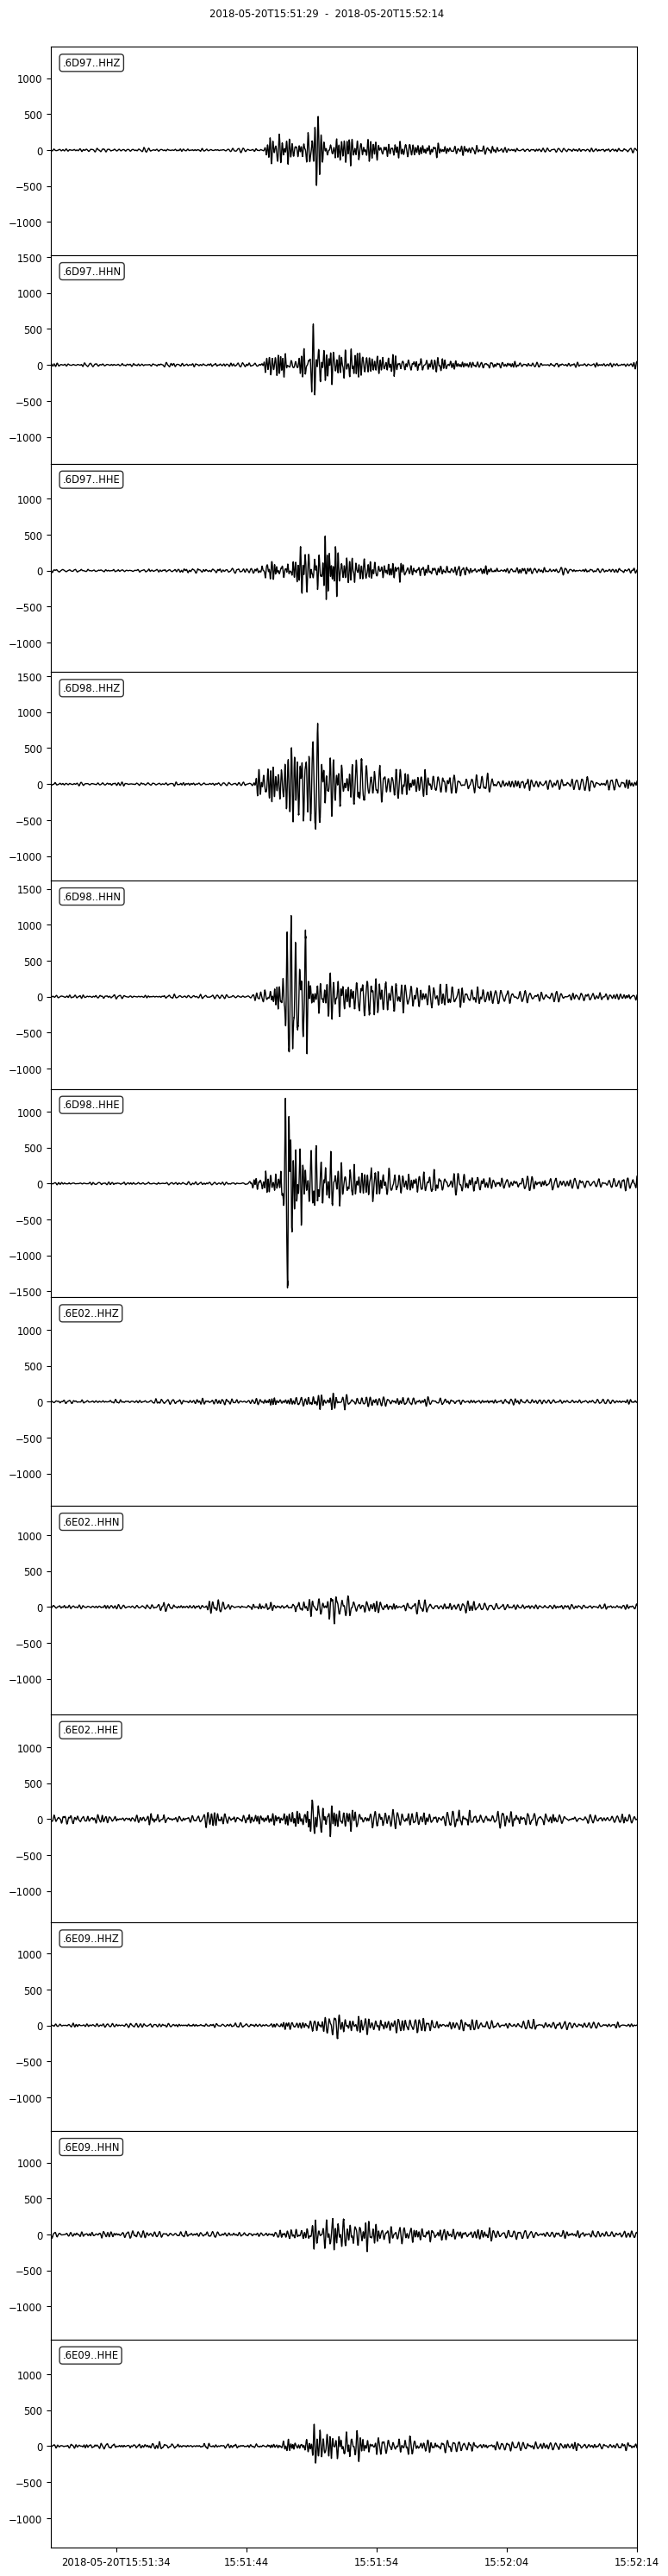

2018-05-20T15:51:44.000000Z


In [64]:
stream = read(data_folder+"\\20180520155141-2018052015514435671530-augmented-cutted.msd")
stream.plot()
times = stream[0].times("utcdatetime")
print(times[1500])

In [97]:
timestamp_dict

{1525478598: 0,
 1525478960: 1,
 1525511242: 2,
 1525541376: 3,
 1525541449: 4,
 1525542793: 5,
 1525550156: 6,
 1525562505: 7,
 1525594014: 8,
 1525622951: 9,
 1525623092: 10,
 1525623164: 11,
 1525649595: 12,
 1525671923: 13,
 1525672487: 14,
 1525675706: 15,
 1525676141: 16,
 1525680075: 17,
 1525683281: 18,
 1525752449: 19,
 1525796421: 20,
 1525820510: 21,
 1525820989: 22,
 1525850051: 23,
 1525850659: 24,
 1525850953: 25,
 1525862784: 26,
 1525871374: 27,
 1525872358: 28,
 1525898202: 29,
 1525898286: 30,
 1525928591: 31,
 1525928597: 32,
 1525928753: 33,
 1525945960: 34,
 1525945990: 35,
 1525946065: 36,
 1525946561: 37,
 1525946684: 38,
 1525947104: 39,
 1525974042: 40,
 1525974733: 41,
 1526088178: 42,
 1526093894: 43,
 1526131494: 44,
 1526173335: 45,
 1526173548: 46,
 1526174215: 47,
 1526174859: 48,
 1526188755: 49,
 1526245161: 50,
 1526258365: 51,
 1526258443: 52,
 1526258477: 53,
 1526258530: 54,
 1526259927: 55,
 1526277946: 56,
 1526278486: 57,
 1526310314: 58,
 152631

In [62]:
for index, row in df.iterrows():
    if np.array_equal(row.X, X_test[0]):
        print(row.FN, row.Y)
        break

20180520155141-2018052015514435671530-augmented-cutted.msd 1500


In [103]:
X_test[2]

array([ 0.00424314,  0.00470409,  0.00495152, ...,  0.00837637,
        0.00249369, -0.00287231])

In [26]:
yp = modela.predict_classes(np.array(X_test))

In [27]:
accuracy_score(yp, y_test)

0.6151614073268045

# CNN

In [28]:
ns = 87
nu=ns

In [34]:
xe = np.expand_dims(X_train, axis=-1)

modelb = Sequential()
modelb.add(Conv1D(filters=32, kernel_size=32,
                     padding='valid', 
                     activation='relu', 
                     input_shape=(4501, 1)))

# необходимо привести результаты применения свертки к 2D виду
modelb.add(Flatten())    
modelb.add(Dense(nu, activation='relu'))
modelb.add(Dropout(0.2))
modelb.add(Dense(nu, activation='relu'))
modelb.add(Dropout(0.3))
modelb.add(Dense(ns, activation='softmax')) #'sigmoid'))
modelb.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(), #SGD(lr=learning_rate),
              metrics=['accuracy'])

In [35]:
modelb.fit(xe, y_train,
          epochs=32, #epochs,
          batch_size=16,
          validation_split=.1)

Train on 5035 samples, validate on 560 samples
Epoch 1/32
5035/5035 [==============================] - 80s 16ms/step - loss: 4.2914 - acc: 0.0546 - val_loss: 3.9567 - val_acc: 0.0964
Epoch 2/32
5035/5035 [==============================] - 78s 15ms/step - loss: 2.7984 - acc: 0.3583 - val_loss: 3.2164 - val_acc: 0.3304
Epoch 3/32
5035/5035 [==============================] - 77s 15ms/step - loss: 1.2088 - acc: 0.7021 - val_loss: 3.0077 - val_acc: 0.4911
Epoch 4/32
5035/5035 [==============================] - 77s 15ms/step - loss: 0.4399 - acc: 0.8838 - val_loss: 3.3816 - val_acc: 0.5607
Epoch 5/32
5035/5035 [==============================] - 77s 15ms/step - loss: 0.1521 - acc: 0.9613 - val_loss: 3.8904 - val_acc: 0.5696
Epoch 6/32
5035/5035 [==============================] - 78s 15ms/step - loss: 0.0751 - acc: 0.9815 - val_loss: 4.1247 - val_acc: 0.5911
Epoch 7/32
5035/5035 [==============================] - 78s 15ms/step - loss: 0.0892 - acc: 0.9764 - val_loss: 4.3209 - val_acc: 0.5964
E

KeyboardInterrupt: 

In [36]:
yp = modelb.predict_classes(np.expand_dims(X_test, axis=-1))

In [32]:
yp

array([73, 51,  1, ..., 64, 58, 34], dtype=int64)

In [37]:
accuracy_score(yp, y_test)

0.6035545883206384

In [43]:
xe = np.expand_dims(X_train, axis=-1)

modelc = Sequential()
modelc.add(Conv1D(filters=32, kernel_size=32,
                     padding='valid', 
                     activation='relu', 
                     input_shape=(4501, 1)))

# необходимо привести результаты применения свертки к 2D виду
modelc.add(Flatten())    
modelc.add(Dense(nu, activation='relu'))
modelc.add(Dropout(0.2))
modelc.add(Dense(nu, activation='relu'))
modelc.add(Dropout(0.3))
modelc.add(Dense(ns, activation='softmax')) #'sigmoid'))
modelc.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(), #SGD(lr=learning_rate),
              metrics=['accuracy'])

In [71]:
modelc.fit(xe, y_train,
          epochs=16, #epochs,
          batch_size=32,
          validation_split=.1)

Train on 5035 samples, validate on 560 samples
Epoch 1/16
 160/5035 [..............................] - ETA: 1:18 - loss: 1.0311 - acc: 0.7250

KeyboardInterrupt: 

In [46]:
yp = modelc.predict_classes(np.expand_dims(X_test, axis=-1))
accuracy_score(yp, y_test)

0.5589408777656873

In [93]:
xe = np.expand_dims(X_train, axis=-1)

modeld = Sequential()
modeld.add(Conv1D(filters=32, kernel_size=32,
                     padding='valid', 
                     activation='relu', 
                     input_shape=(4501, 1)))
modeld.add(Conv1D(filters=32, kernel_size=32))
modeld.add(MaxPooling1D(3))
modeld.add(Dropout(0.5))
modeld.add(Conv1D(filters=32, kernel_size=32))
# modeld.add(Conv1D(filters=128, kernel_size=32))
# modeld.add(Conv1D(filters=128, kernel_size=32))
modeld.add(Flatten()) 
modeld.add(Dense(nu, activation='relu'))
modeld.add(Dense(ns, activation='softmax')) #'sigmoid'))
           
modeld.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(), #SGD(lr=learning_rate),
              metrics=['accuracy'])

In [94]:
modeld.fit(xe, y_train,
          epochs=8, #epochs,
          batch_size=32,
          validation_split=.1)

Train on 5035 samples, validate on 560 samples
Epoch 1/8
5035/5035 [==============================] - 173s 34ms/step - loss: 4.3132 - acc: 0.0562 - val_loss: 4.0334 - val_acc: 0.1054
Epoch 2/8
5035/5035 [==============================] - 172s 34ms/step - loss: 2.7671 - acc: 0.3835 - val_loss: 3.1682 - val_acc: 0.3732
Epoch 3/8
5035/5035 [==============================] - 172s 34ms/step - loss: 0.9499 - acc: 0.7587 - val_loss: 3.0300 - val_acc: 0.5321
Epoch 4/8
5035/5035 [==============================] - 173s 34ms/step - loss: 0.3387 - acc: 0.9051 - val_loss: 4.1190 - val_acc: 0.5696
Epoch 5/8
5035/5035 [==============================] - 172s 34ms/step - loss: 0.2503 - acc: 0.9285 - val_loss: 4.7482 - val_acc: 0.5679
Epoch 6/8
5035/5035 [==============================] - 173s 34ms/step - loss: 0.2695 - acc: 0.9235 - val_loss: 4.7373 - val_acc: 0.5643
Epoch 7/8
5035/5035 [==============================] - 173s 34ms/step - loss: 0.1948 - acc: 0.9450 - val_loss: 4.8415 - val_acc: 0.5732
E

In [95]:
yp = modeld.predict_classes(np.expand_dims(X_test, axis=-1))
accuracy_score(yp, y_test)

0.6086325716358361

In [99]:
xe = np.expand_dims(X_train, axis=-1)

modele = Sequential()
modele.add(Conv1D(filters=32, kernel_size=32,
                     padding='valid', 
                     activation='relu', 
                     input_shape=(4501, 1)))
modele.add(Conv1D(filters=32, kernel_size=32))
modele.add(MaxPooling1D(3))
modele.add(Dropout(0.2))
modele.add(Conv1D(filters=32, kernel_size=32))
modele.add(MaxPooling1D(5))
modele.add(Dropout(0.3))
modele.add(Flatten()) 
modele.add(Dense(nu, activation='relu'))
modele.add(Dense(ns, activation='softmax')) #'sigmoid'))
           
modele.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(), #SGD(lr=learning_rate),
              metrics=['accuracy'])

In [100]:
%%time
modele.fit(xe, y_train,
          epochs=8, #epochs,
          batch_size=32,
          validation_split=.1)

Train on 5035 samples, validate on 560 samples
Epoch 1/8
5035/5035 [==============================] - 165s 33ms/step - loss: 4.3439 - acc: 0.0300 - val_loss: 4.0664 - val_acc: 0.0661
Epoch 2/8
5035/5035 [==============================] - 164s 33ms/step - loss: 3.2357 - acc: 0.2522 - val_loss: 3.2888 - val_acc: 0.2821
Epoch 3/8
5035/5035 [==============================] - 167s 33ms/step - loss: 1.4683 - acc: 0.6359 - val_loss: 2.9319 - val_acc: 0.4893
Epoch 4/8
5035/5035 [==============================] - 165s 33ms/step - loss: 0.5354 - acc: 0.8479 - val_loss: 3.4801 - val_acc: 0.5679
Epoch 5/8
5035/5035 [==============================] - 164s 33ms/step - loss: 0.2780 - acc: 0.9194 - val_loss: 4.1329 - val_acc: 0.5607
Epoch 6/8
5035/5035 [==============================] - 164s 33ms/step - loss: 0.2157 - acc: 0.9349 - val_loss: 3.9954 - val_acc: 0.5946
Epoch 7/8
5035/5035 [==============================] - 165s 33ms/step - loss: 0.1870 - acc: 0.9426 - val_loss: 3.9418 - val_acc: 0.5875
E

In [101]:
yp = modele.predict_classes(np.expand_dims(X_test, axis=-1))
accuracy_score(yp, y_test)

0.6177003989844033